In [ ]:
# ✅ Data Cleaning
# ✅ Exploratory Data Analysis (EDA)
# ✅ Feature Selection
# ✅ Model Training & Evaluation
# ✅ Feature Importance Analysis
# ✅ Model Saving

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # For saving the model

In [ ]:
df = pd.read_csv("/content/IBM HR.csv")  # Load the dataset

In [ ]:
print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
print(df.columns)  # To see which columns exist

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
print(df.shape)  # Output: (1470, 35)


(1470, 35)


In [ ]:
print(df.isnull().sum())  # Output should be 0 if no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
# Data Cleaning (Drop Unnecessary Columns)

In [ ]:
# Define columns to drop
columns_to_drop = ["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"]

# Keep only existing columns
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop only the existing columns
df.drop(columns=existing_columns, inplace=True)

# Convert 'Attrition' from Yes/No to 1/0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [ ]:
# Exploratory Data Analysis (EDA)

In [ ]:
# ✅ Attrition Rate Distribution

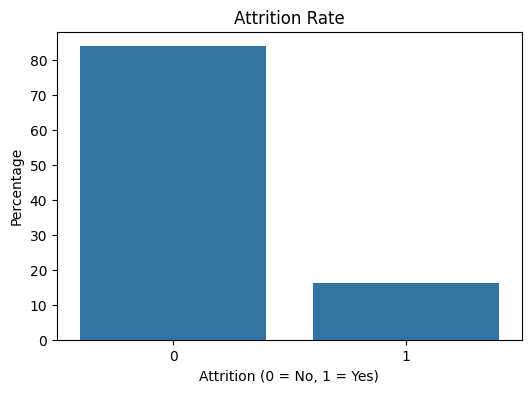

In [ ]:
attrition_counts = df["Attrition"].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.title("Attrition Rate")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.show()


In [ ]:
# ✅ Attrition by Age

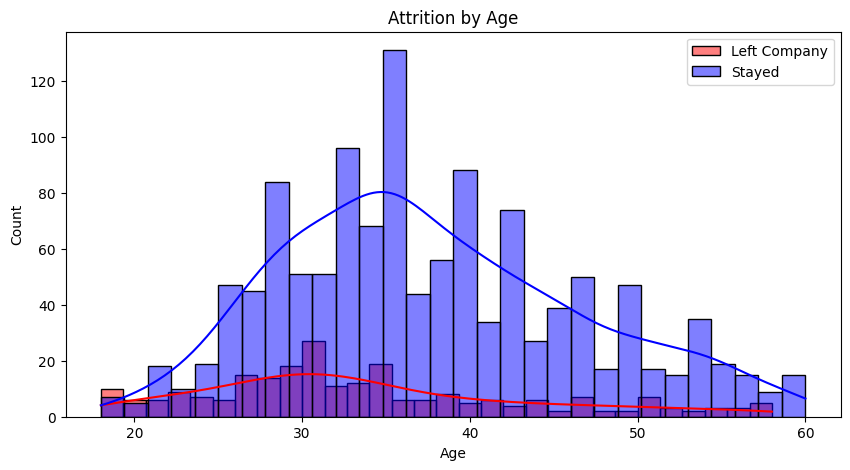

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df["Attrition"] == 1]["Age"], bins=30, kde=True, color="red", label="Left Company")
sns.histplot(df[df["Attrition"] == 0]["Age"], bins=30, kde=True, color="blue", label="Stayed")
plt.legend()
plt.title("Attrition by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
# ✅ Attrition by Department

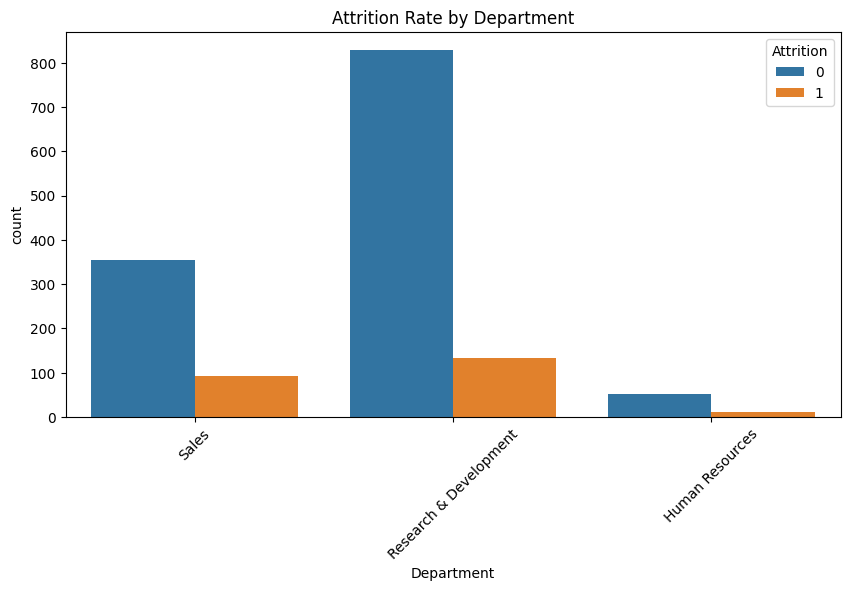

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition Rate by Department")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# ✅ Attrition by Job Role

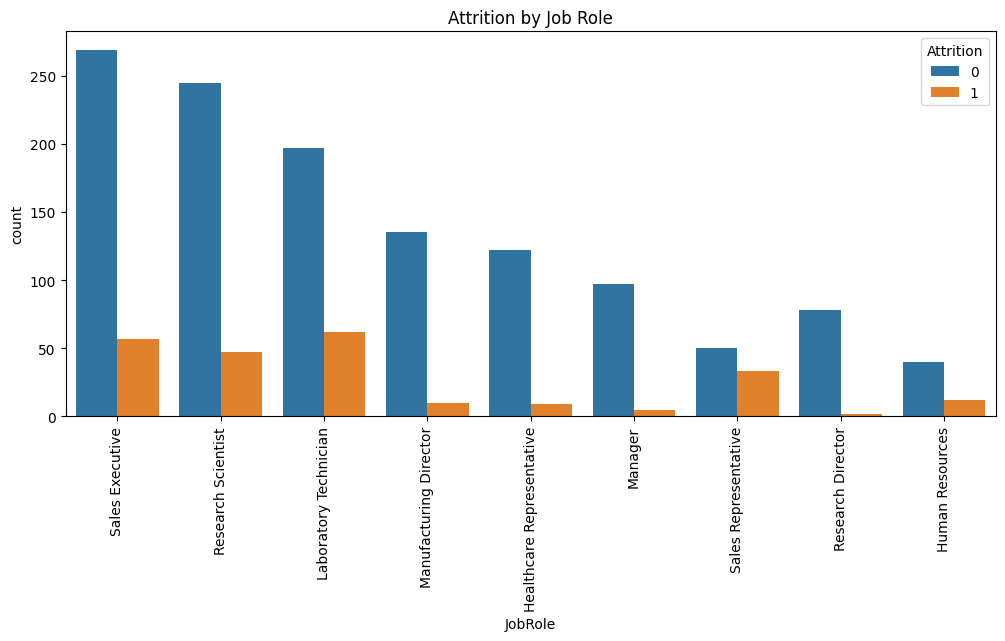

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x="JobRole", hue="Attrition", data=df)
plt.title("Attrition by Job Role")
plt.xticks(rotation=90)
plt.show()

In [ ]:
features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction',
            'JobLevel', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition']

df_selected = df[features]

In [ ]:
df_selected.to_csv("Cleaned_HR_Data.csv", index=False)

In [ ]:
# Train-Test Split

In [ ]:
X = df_selected.drop("Attrition", axis=1)  # Features
y = df_selected["Attrition"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Data Scaling (Standardization)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
 # Train the Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [ ]:
# Feature Importance Plot

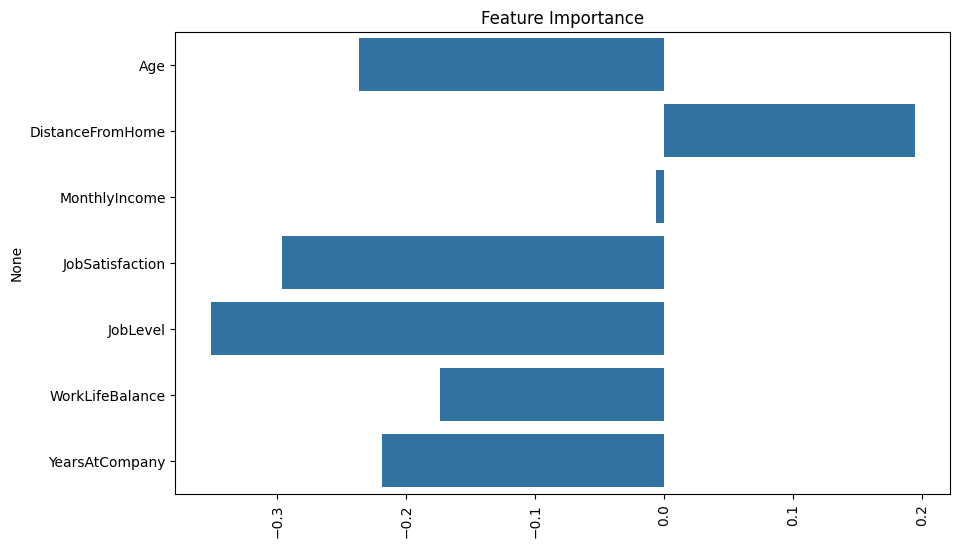

In [ ]:
features = X.columns
importances = model.coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Model Evaluation

In [ ]:
# ✅ Check Accuracy

In [ ]:
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 86.73%


In [ ]:
# ✅ Generate Classification Report

In [ ]:
from sklearn.metrics import precision_recall_curve

y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of class 1
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Set a custom threshold (e.g., 0.3 instead of 0.5)
y_pred_custom = (y_probs > 0.3).astype(int)

print(pd.Series(y_pred_custom).value_counts())  # Should show both 0 and 1


0    294
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
import numpy as np

print(np.unique(y_pred, return_counts=True))  # Check how many 0s and 1s are predicted


(array([0]), array([294]))


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.93      0.50      0.46       294
weighted avg       0.88      0.87      0.81       294



In [ ]:
# ✅ Confusion Matrix

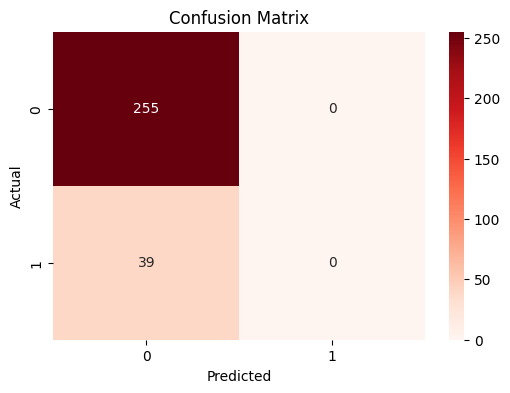

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
joblib.dump(model, "attrition_model.pkl")


['attrition_model.pkl']

In [ ]:
import pandas as pd

# Reload the dataset
df = pd.read_csv("/content/IBM HR.csv")

# Drop unnecessary columns
columns_to_drop = ["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"]
existing_columns = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns, inplace=True)

# Convert 'Attrition' from Yes/No to 1/0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select important features
features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction',
            'JobLevel', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition']
df_selected = df[features]

# Save Cleaned Data
df_selected.to_csv("Cleaned_HR_Data.csv", index=False)


In [ ]:
from google.colab import files
files.download("Cleaned_HR_Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>